In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA_Texas_District_v1.csv', sep=',', header=0)
print(df.shape)
df = pd.get_dummies(df, columns=['Locale'], prefix='Locale')
print(df.shape)
df['Label_Math_TXT'] = df['Label_Math'].apply(lambda x: 'Expected' if x==0 else 'Loss' if x==-1 else 'Gain')
df['Label_Reading_TXT'] = df['Label_Reading'].apply(lambda x: 'Expected' if x==0 else 'Loss' if x==-1 else 'Gain')

(1165, 950)
(1165, 961)


### Label: LL-Label-Dist
* LL_Label_Dist.png

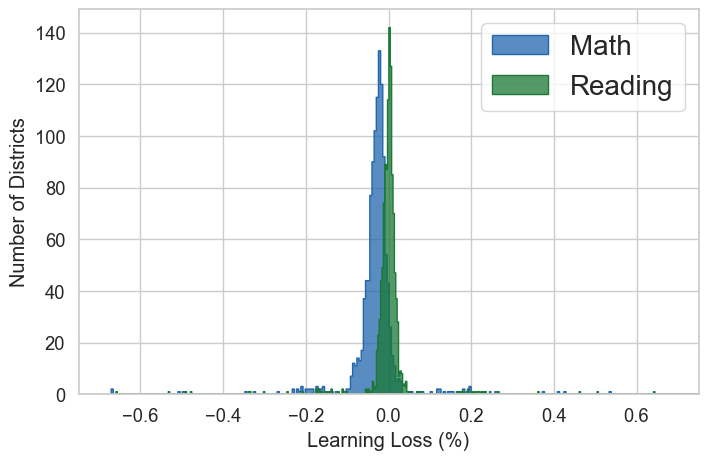

In [3]:
sns.set(rc={'figure.figsize':(8,5)}, style="whitegrid", font_scale=1.2)

g = sns.histplot(data=df, x='% LOSS Math', shrink=0.8, color='#2166ac', label='Math', element="step", stat="count")
g = sns.histplot(data=df, x='% LOSS Reading', shrink=0.8, color='#1b7837', label='Reading', element="step", stat="count")
g.set(xlabel='Learning Loss (%)', ylabel='Number of Districts')#, title='% Loss - Subject')
g.set_xlim(-.75, .75)
plt.legend(loc='upper right', fontsize=20)
plt.show()

### Label: LL-Selection-Math
* Selection_Math_OnCampus.png (`% On Campus 10/30/20`)

/var/folders/r0/cx28jby50vv14k5xp2yrpdkm0000gn/T/ipykernel_76576/1880583851.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  g=sns.swarmplot(data=df, x='Label_Math_TXT', y="% On Campus 10/30/20", size=4, order=['Loss', 'Expected', 'Gain'],


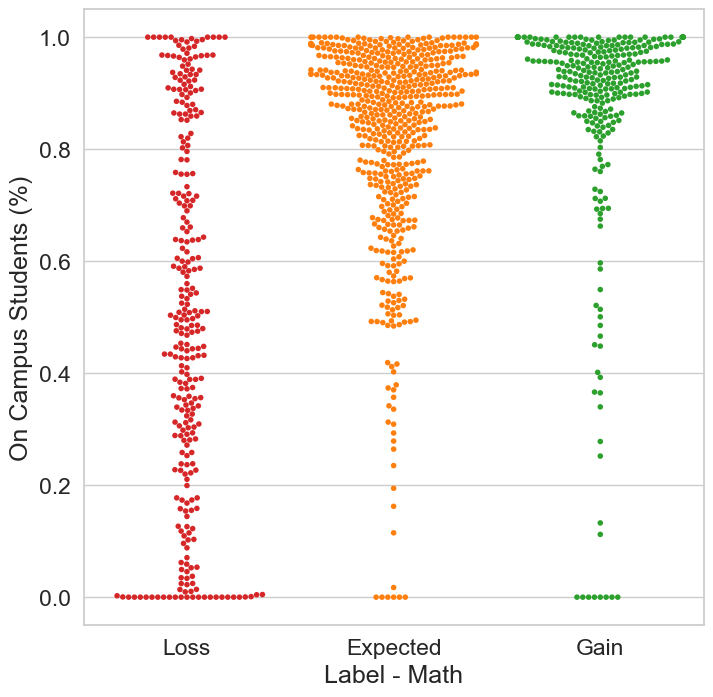

In [4]:
sns.set(rc={'figure.figsize':(8,8)}, style="whitegrid", font_scale=1.5)


g=sns.swarmplot(data=df, x='Label_Math_TXT', y="% On Campus 10/30/20", size=4, order=['Loss', 'Expected', 'Gain'],
               palette=['tab:red', 'tab:orange', 'tab:green'])
g.set(xlabel='Label - Math', ylabel='On Campus Students (%)') #title='District On-Campus Enrollment on 10/30/20', 

plt.show()

### Label: LL-Selection-Reading-ESSER
* Selection_Reading_ESSER1.png (`CARES ESSER I 20`)
* Selection_Reading_ESSER2.png (`CRRSA ESSER II 21`)
* Selection_Reading_ESSER3.png (`ARP ESSER III 21`)
* Selection_Reading_ESSER_SUPP1.png (`ESSER-SUPP 22`)
* Selection_Reading_ESSER_SUPP2.png (`ESSER-SUPP 23`)

In [5]:
cols = ['CARES ESSER I 20', #2019
'CRRSA ESSER II 21', #2019
'ARP ESSER III 21', #2019
'ESSER-SUPP 22',
'ESSER-SUPP 23']

cols_short = ['ESSER I', #2019
'ESSER II', #2019
'ESSER III', #2019
'ESSER-SUPP 2022',
'ESSER-SUPP 2023']

esser = df[cols+['Label_Reading', 'Total Students 2018-2019', 'Total Students 2020-2021']].copy()

In [6]:
for c in cols:
    esser[c+" per student"]=esser.apply(lambda x: x[c]/x['Total Students 2018-2019'], axis=1)
    esser[c+" per student 2021"]=esser.apply(lambda x: x[c]/x['Total Students 2020-2021'], axis=1)
esser['Label']=esser['Label_Reading'].apply(lambda x: "Expected" if x==0 else "Gain" if x==1 else "Loss")

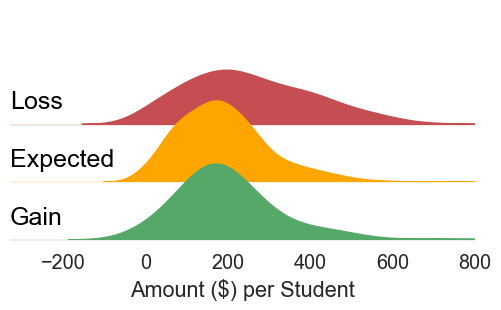

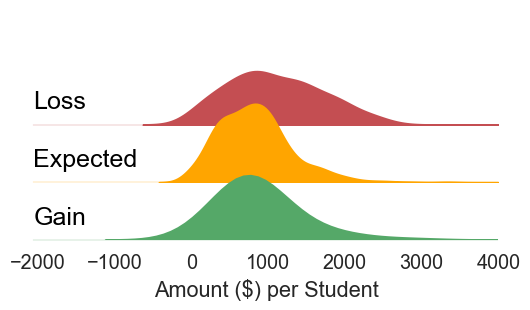

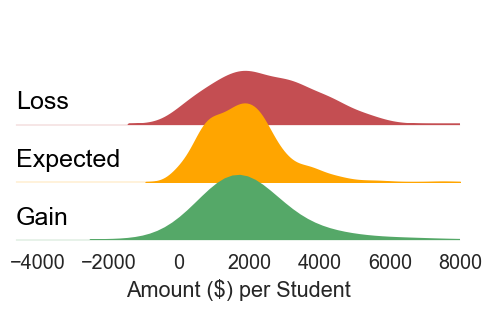

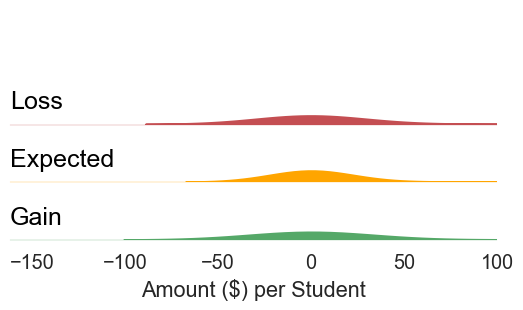

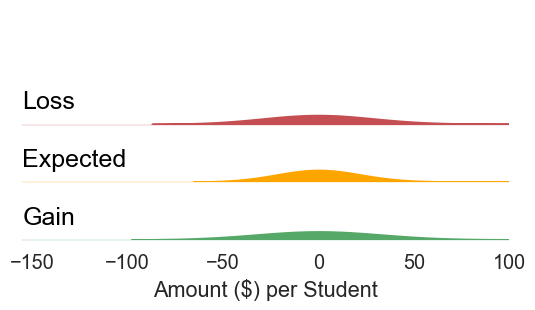

In [7]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2}, font_scale=1.3)
x_lim=[800, 4000, 8000, 100, 100]
row_order=['Loss', 'Expected', 'Gain']
color_label={'Expected': 'orange', 'Gain': 'g', 'Loss': 'r'}

for c, c_short, x in zip(cols, cols_short, x_lim):
    g = sns.FacetGrid(esser, palette=color_label, row="Label", hue="Label", row_order=row_order, aspect=5, height=1.2)

    g.map_dataframe(sns.kdeplot, x=c+" per student", fill=True, alpha=1, linewidth=1.5)
    g.map_dataframe(sns.kdeplot, x=c+" per student", color='w', lw=0, bw_adjust=.1)

    g.refline(y=0, linewidth=.2, linestyle="-", color=None, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0.0, 0.2, label, color='black', fontsize=18, # ajust x, y value for label location
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, "Label")
    g.fig.subplots_adjust(hspace=-.5)
    g.set_titles("")
    g.set(xlabel="Amount ($) per Student", ylabel="", yticks=[])
    g.despine(left=True, bottom=True)
    g.set(xlim=(None,x))#, ylim=(0, 0.01))
#     plt.suptitle(c_short+" per Student", y=0.98)
plt.show()

### Label: LL-BL

In [8]:
df_bl_math=pd.read_csv('Modeling_BL_Math.csv')
df_bl_read=pd.read_csv('Modeling_BL_Reading.csv')
df_gb_math=pd.read_csv('Modeling_GB_Math.csv')
df_gb_read=pd.read_csv('Modeling_GB_Reading.csv')

In [9]:
bl_order=['Log Reg Ridge', 'SVM', 'KNN', 'Random Forests', 'Gradient Boost']
gb_order=['CatBoost', 'HistGradientBoost', 'LightGBM', 'XGBoost']
model_ren={'Ridge': 'Log Reg Ridge', 'KNN': 'KNN', 'SVM': 'SVM','SVM-Linear': 'SVM', 'SVM-Kernel': 'SVM Kernel', 'SGD': 'SGD', 'RF': 'Random Forests', 'GB': 'Gradient Boost', 'CatBoost': 'CatBoost', 'LightGBM': 'LightGBM', 'XGBoost': 'XGBoost', 'HistGB': 'HistGradientBoost'}
palette_math=sns.color_palette(["#2c7bb6", "#fdae61", "#91bfdb"])
palette_read=sns.color_palette(["#018571", "#a6611a", "#80cdc1"])

* LL_BL_Math.png

In [10]:
bl_math = pd.melt(df_bl_math, id_vars=['Model', 'n Selected', 'Method'], 
             value_vars=['Test Accuracy', 'F1', 'MCC'], var_name="Metrics")

bl_math["Model"]=bl_math["Model"].map(model_ren)
bl_math["Metrics"]=bl_math["Metrics"].apply(lambda x: "Accuracy" if x=="Test Accuracy" else x)
print(bl_math.shape)

(150, 5)


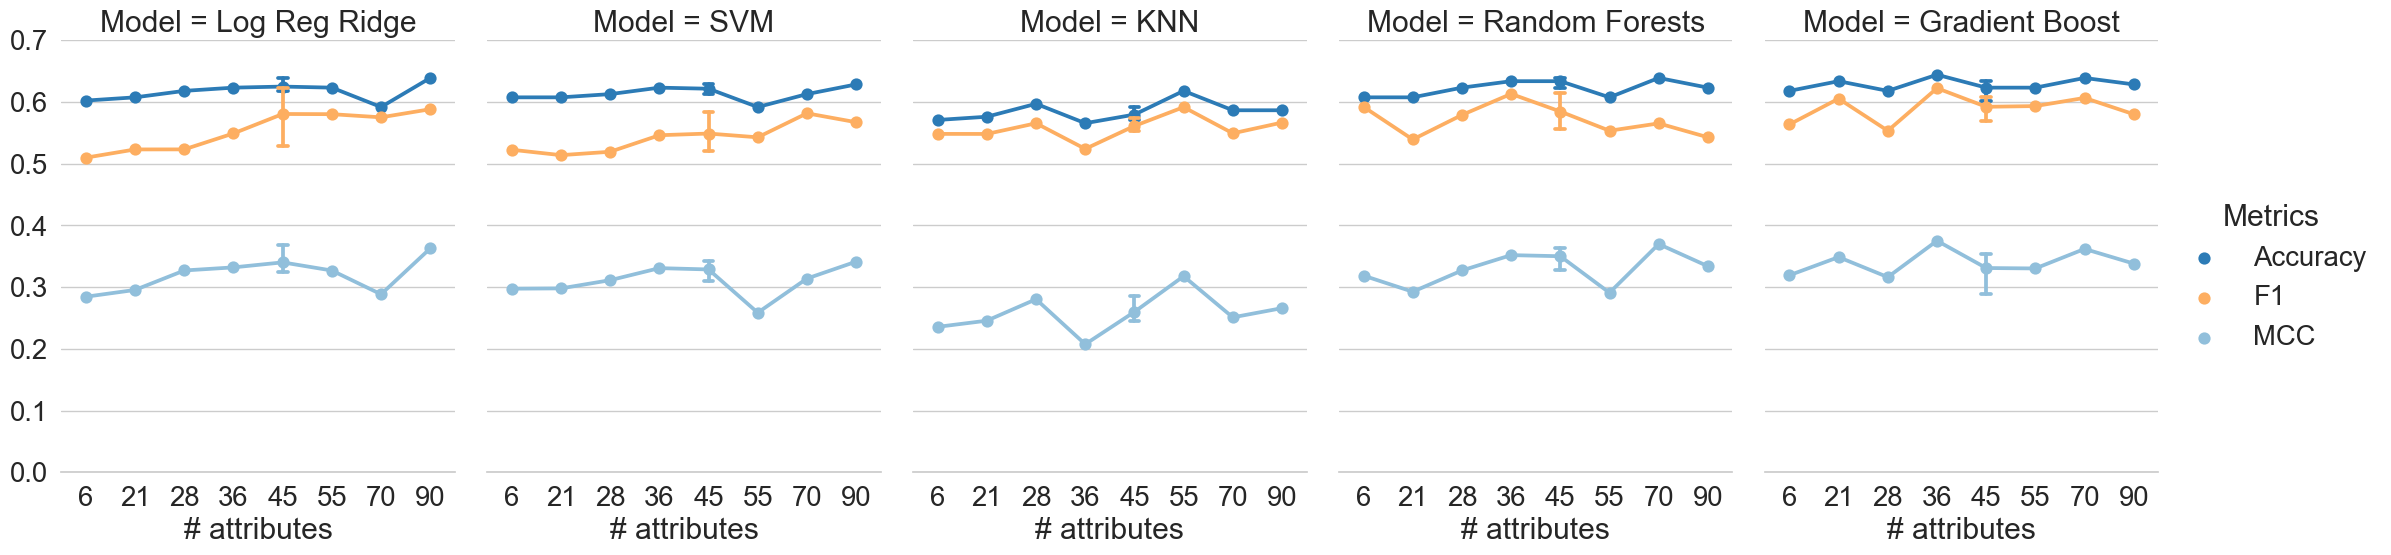

In [11]:
sns.set(rc={'figure.figsize':(20,20)}, style='whitegrid', font_scale=1.8)

g = sns.catplot(data=bl_math, x="n Selected", y="value", hue="Metrics", col="Model",
                col_order=bl_order,
                capsize=.2, palette=palette_math, height=6, aspect=.75,
                kind="point")
g.set(xlabel="# attributes", ylabel="")
g.set(ylim=(0, 0.7))
g.despine(left=True)
plt.show()

* LL_BL_Reading.png

In [12]:
bl_read = pd.melt(df_bl_read, id_vars=['Model', 'n Selected', 'Method'], 
             value_vars=['Test Accuracy', 'F1', 'MCC'], var_name="Metrics")

bl_read["Model"]=bl_read["Model"].map(model_ren)
bl_read["Metrics"]=bl_read["Metrics"].apply(lambda x: "Accuracy" if x=="Test Accuracy" else x)
print(bl_read.shape)

(150, 5)


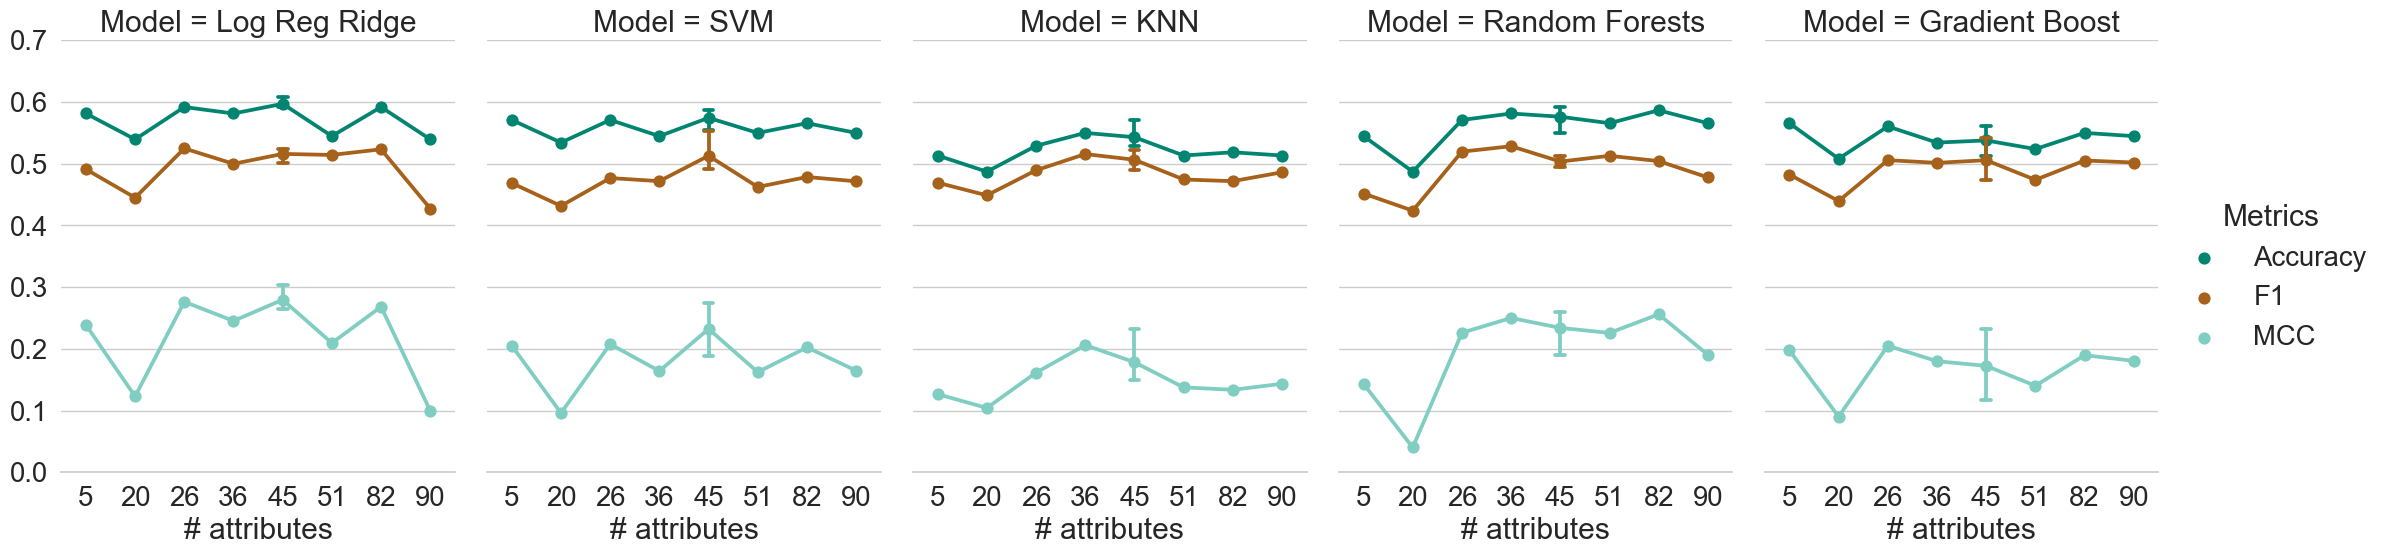

In [13]:
sns.set(rc={'figure.figsize':(20,20)}, style='whitegrid', font_scale=1.8)

g = sns.catplot(data=bl_read, x="n Selected", y="value", hue="Metrics", col="Model",
                col_order=bl_order,
                capsize=.2, palette=palette_read, height=6, aspect=.75,
                kind="point")
g.set(xlabel="# attributes", ylabel="")
g.set(ylim=(0, 0.7))
g.despine(left=True)
plt.show()

### Label: LL-GB

* LL_GB_Math.png

In [14]:
gb_math = pd.melt(df_gb_math, id_vars=['Model', 'n Selected', 'Method'], 
             value_vars=['Test Accuracy', 'F1', 'MCC'], var_name="Metrics")
gb_math["Model"]=gb_math["Model"].map(model_ren)
gb_math["Metrics"]=gb_math["Metrics"].apply(lambda x: "Accuracy" if x=="Test Accuracy" else x)
print(gb_math.shape)

(120, 5)


In [15]:
gb_order=['Gradient Boost','CatBoost', 'HistGradientBoost', 'LightGBM', 'XGBoost']
temp=bl_math[bl_math["Model"].isin(["Gradient Boost"])]
gb_math=pd.concat([gb_math, temp], ignore_index=True)
print(gb_math.shape)

(150, 5)


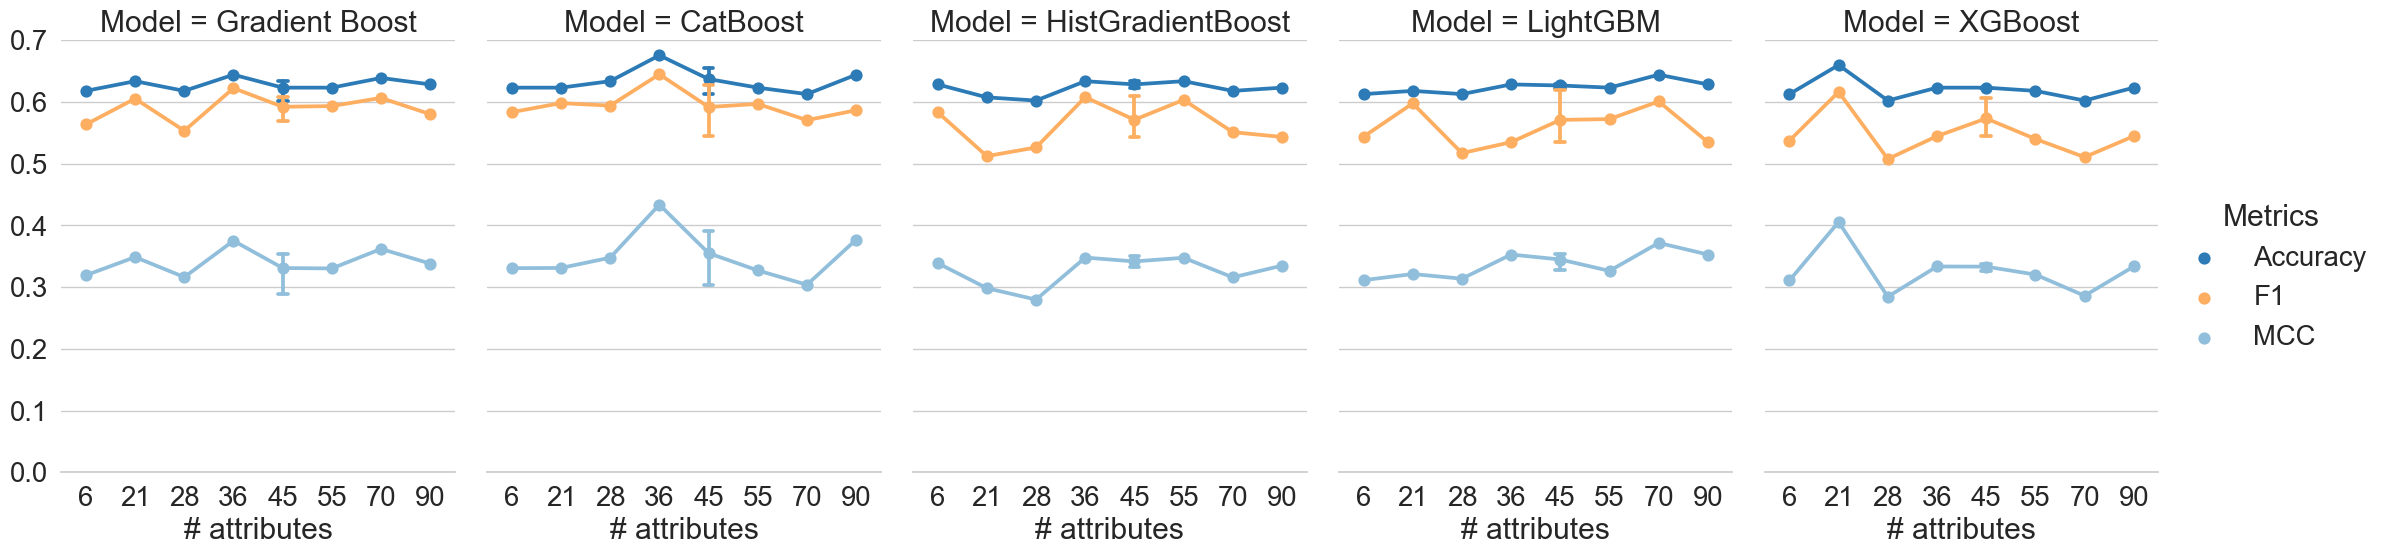

In [16]:
sns.set(rc={'figure.figsize':(20,20)}, style='whitegrid', font_scale=1.8)

g = sns.catplot(data=gb_math, x="n Selected", y="value", hue="Metrics", col="Model",
                col_order=gb_order,
                capsize=.2, palette=palette_math, height=6, aspect=.75,
                kind="point")
g.set(xlabel="# attributes", ylabel="")
g.set(ylim=(0, 0.7))
g.despine(left=True)
plt.show()

* LL_GB_Reading.png

In [17]:
gb_read = pd.melt(df_gb_read, id_vars=['Model', 'n Selected', 'Method'], 
             value_vars=['Test Accuracy', 'F1', 'MCC'], var_name="Metrics")
gb_read["Model"]=gb_read["Model"].map(model_ren)
gb_read["Metrics"]=gb_read["Metrics"].apply(lambda x: "Accuracy" if x=="Test Accuracy" else x)
print(gb_read.shape)

(120, 5)


In [18]:
gb_order=['Log Reg Ridge','CatBoost', 'HistGradientBoost', 'LightGBM', 'XGBoost']
temp=bl_read[bl_read["Model"].isin(["Log Reg Ridge"])]
gb_read=pd.concat([gb_read, temp], ignore_index=True)
print(gb_read.shape)

(150, 5)


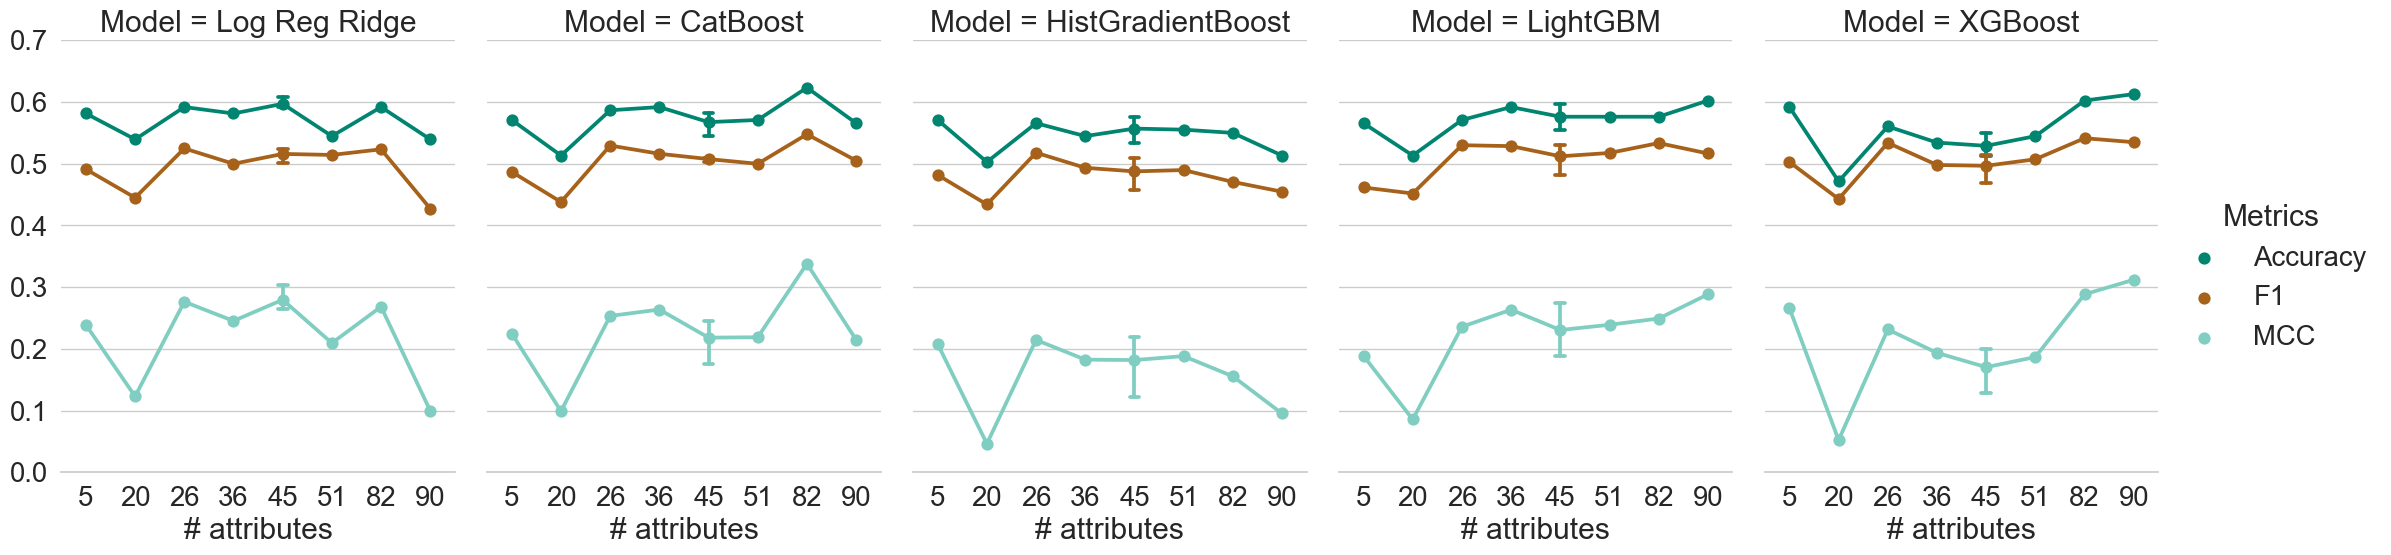

In [19]:
sns.set(rc={'figure.figsize':(20,20)}, style='whitegrid', font_scale=1.8)

g = sns.catplot(data=gb_read, x="n Selected", y="value", hue="Metrics", col="Model",
                col_order=gb_order,
                capsize=.2, palette=palette_read, height=6, aspect=.75,
                kind="point")
g.set(xlabel="# attributes", ylabel="")
g.set(ylim=(0, 0.7))
g.despine(left=True)
plt.show()